# 학생의 성적에 영향을 미치는 요인 파악
- Week3 Pilot Task
- 4기 박정민
- 데이터 모델링 및 평가

# **Week2에서의 전체적인 흐름**
> 1. 데이터 클린업
> 2. 변수 타입 정리
> 3. 이상치 탐색 및 처리 (필요시)
> 4. 범주형 변수 인코딩
> 5. 스케일링 (필요시)
> 6. 피처 엔지니어링 (파생변수 등)

## 라이브러리 및 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EPOCH4기/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()  # 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

- 6607개의 데이터, 20개의 컬럼이 존재.
- 숫자형 변수(int64) : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score (7개)
- 범주형 변수(object) : Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender (13개)

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


- 총 3개의 컬럼에서 결측치 발견 : Teacher_Quality, Parental_Education_Level, Distance_from_Home
- 3개 모두 dtype이 object인 범주형 변수이다.

## Step1. 데이터 클린업
- 결측치가 있는 변수는 모두 범주형이기에, 최빈값으로 대체하거나 Unknown으로 대체 진행

In [ ]:
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
missing_rows = df[df[missing_subset].isnull().any(axis=1)]
missing_rows

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


- 결측치가 존재하는 행은 총 229개로 약 3.466%이다.

### Teacher_Quality 변수 살펴보기
- 결측치가 총 78개 존재

In [ ]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


### Parental_Education_Level 변수 살펴보기
- 결측치가 총 90개 존재


In [ ]:
df['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,3223
College,1989
Postgraduate,1305


### Distance_from_Home 변수 살펴보기
- 결측치가 총 67개 존재

In [ ]:
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


- 결측치가 존재하는 행을 제거하면 데이터 손실이 약 3.466% 이기에 손실률이 낮은 편이다.
- 최빈값으로 대체했을 때 생길 편향 위험과 제거시 3.466% 라는 적은 손실률을 근거로 제거하기로 판단하였다.

In [ ]:
# 결측치가 존재하는 3개 변수
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# 결측치가 있는 행 제거
df_clean = df.dropna(subset=missing_subset)

# 결과 확인
print("원래 데이터 크기:", df.shape)
print("결측치 제거 후 데이터 크기:", df_clean.shape)

원래 데이터 크기: (6607, 20)
결측치 제거 후 데이터 크기: (6378, 20)


### 중복 데이터 확인

In [ ]:
# 전체 중복 행 개수 확인
duplicates = df_clean.duplicated().sum()
print("중복된 행 개수:", duplicates)

중복된 행 개수: 0


In [ ]:
# 인덱스 초기화
df_clean = df_clean.reset_index(drop=True)

# 확인
print(df_clean.head())
print(df_clean.index)


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Step2. 변수 타입 정리

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [ ]:
num_cols = df_clean.select_dtypes(include=['int64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


- num_cols : 숫자형 변수 7개
- cat_cols : 범주형 변수 13개

## Step3. 이상치 탐색 및 처리

- 숫자형 변수는 박스플롯을 이용하여 확인하고, 범주형 변수는 고유값을 확인하여 이상치 탐색

In [ ]:
df_clean.describe()  # 숫자형 변수의 통계정보 확인

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


- 목표변수 Exam_Score에 101점이 존재한다.
- 데이터 입력 오류 가능성이 높기에 101점을 제거하는게 좋아보인다.

In [ ]:
df_clean = df_clean[df_clean['Exam_Score'] <= 100]
df_clean.shape

(6377, 20)

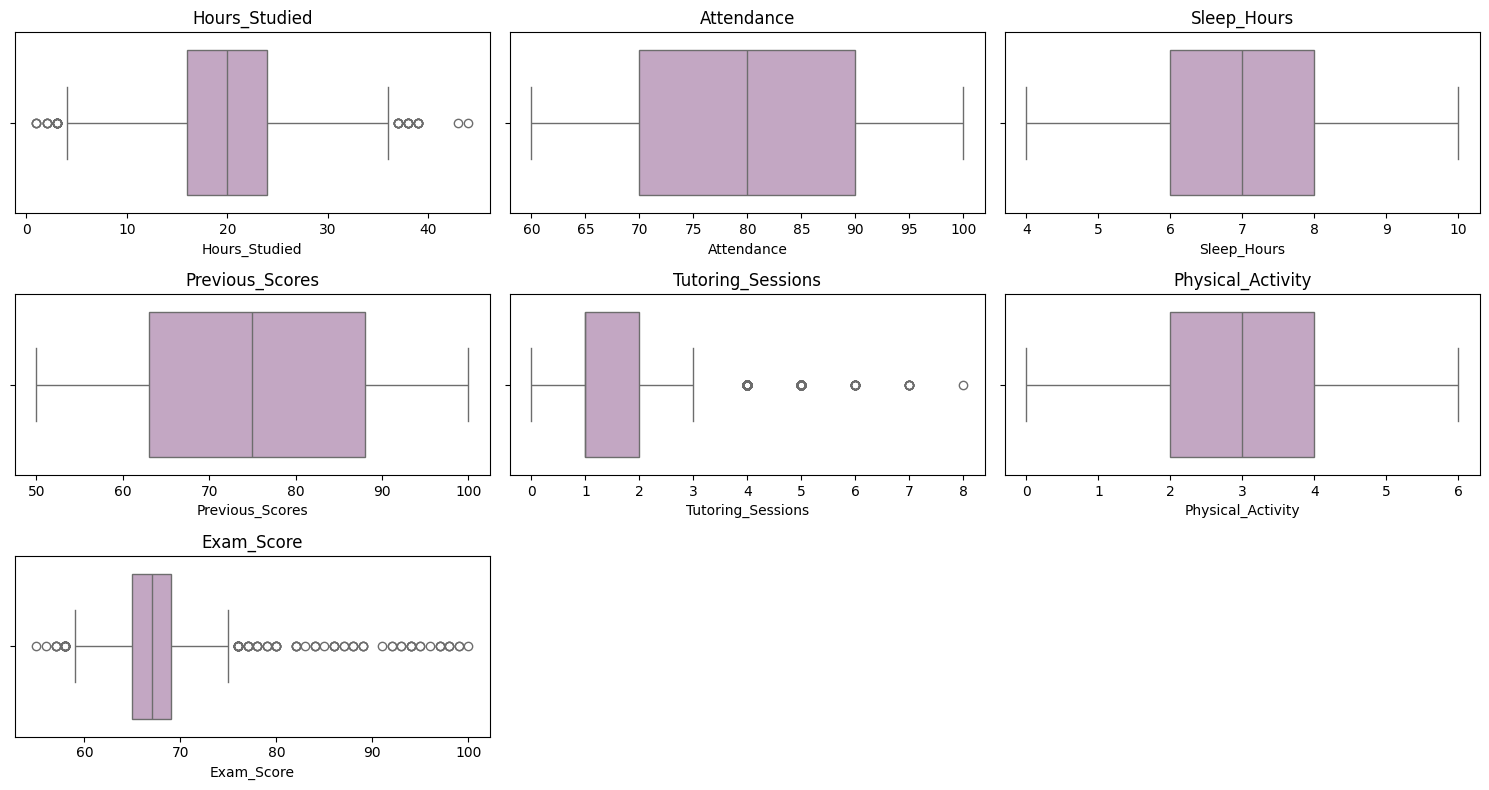

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # 3행 3열 배치 (변수 개수 맞춰 자동 조정)
    sns.boxplot(x=df_clean[col], color="#C8A2C8")  # 연보라색
    plt.title(col)

plt.tight_layout()
plt.show()

- 현재 IQR방식으로 이상치를 판단하자면, Hours_Studied, Tutoring_Sessions, Exam_Score가 이상치가 있는 것으로 판단되지만, 대부분 합리적으로 값들이 존재하므로 일단은 이상치를 제거하지 않는 방향으로 진행하겠음.

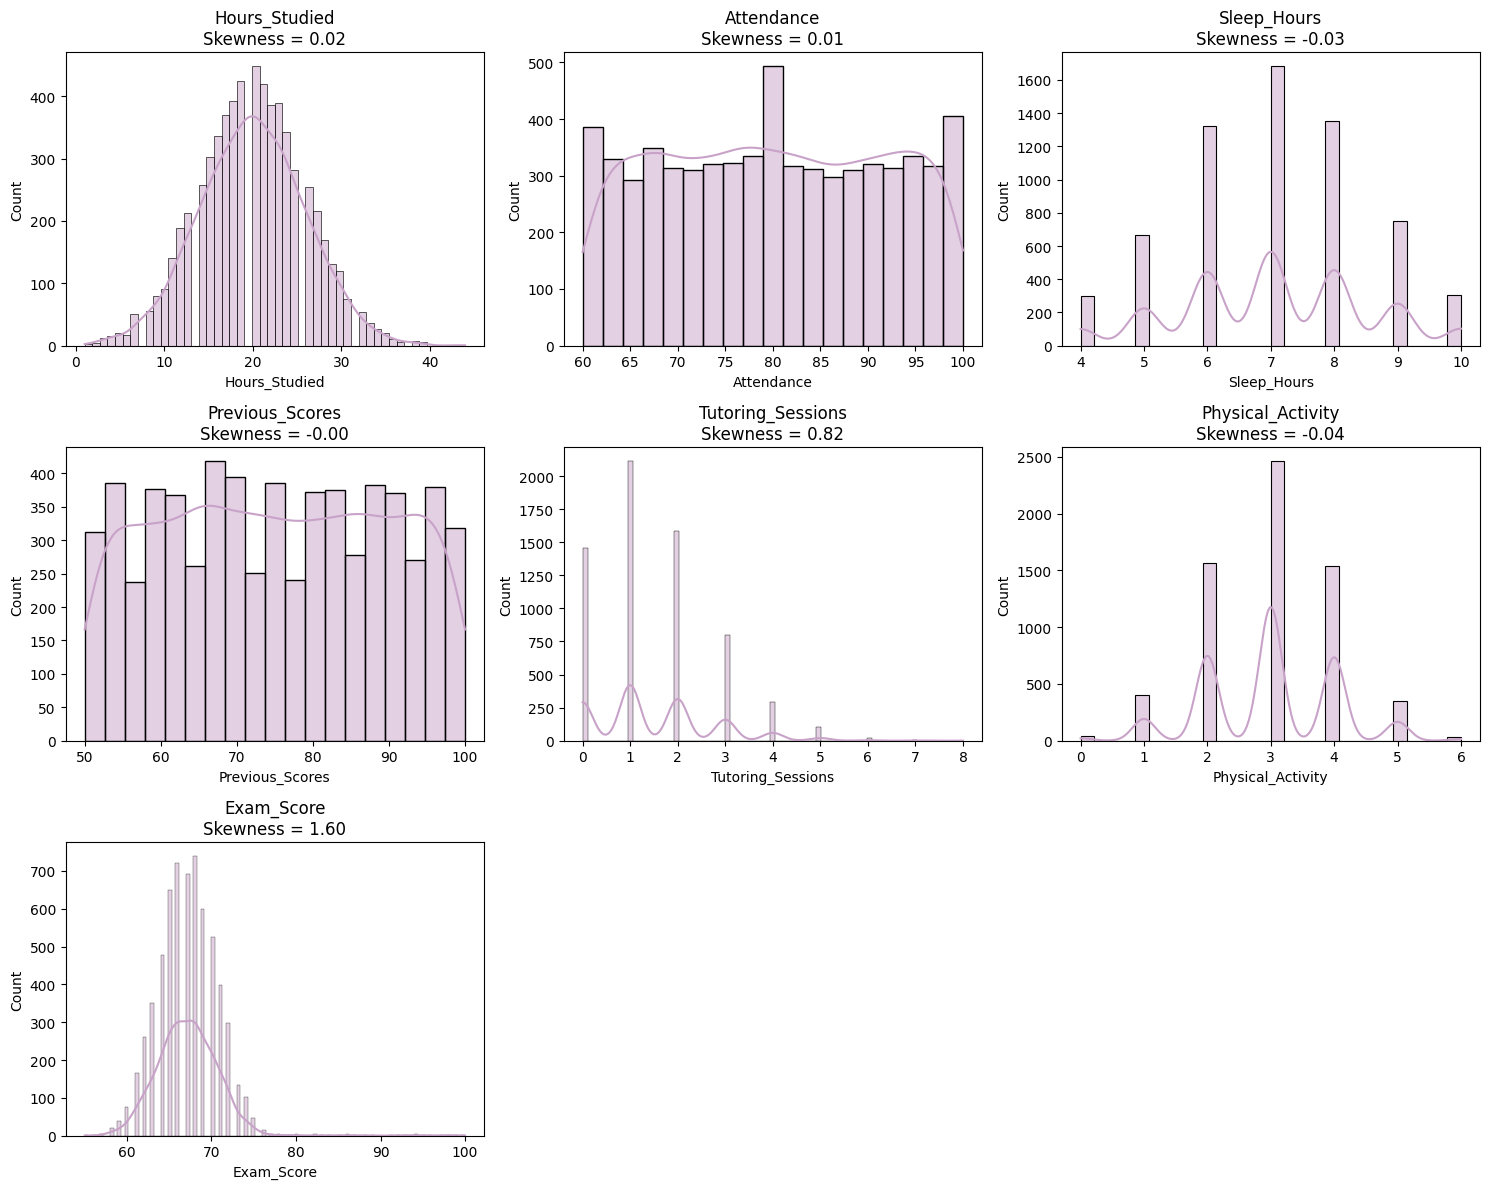

In [ ]:
# 왜도 값 확인을 위한 히스토그램
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3행 3열
    sns.histplot(df_clean[col], kde=True, color="#C8A2C8")
    skew_val = df_clean[col].skew()
    plt.title(f"{col}\nSkewness = {skew_val:.2f}")

plt.tight_layout()
plt.show()

- df_clean : 전처리과정까지 저장된 데이터프레임

## Step4. 범주형 변수 인코딩

- 순서가 중요한 범주형 변수의 경우 Label Encoding을, 명목형 변수인 경우 One-Hot Encoding을 진행하자.
- 순서가 중요한 변수 : Motivation_Level, Parental_Education_Level, Teacher_Quality, Access_to_Resources, Family_Income, Peer_Influence, Distance_from_Home (13개 중 7개)
- 명목형 변수 : Gender, School_Type, Extracurricular_Activities, Internet_Access, Learning_Disabilities, Parental_Involvement (13개 중 6개)

In [ ]:
# 순서형 변수 매핑
ordinal_map = {
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Distance_from_Home": {"Near": 1, "Moderate": 2, "Far": 3}
}

for col, mapping in ordinal_map.items():
    df_clean[col] = df_clean[col].map(mapping)

# 명목형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(
    df_clean,
    columns=['Gender','School_Type','Extracurricular_Activities',
             'Internet_Access','Learning_Disabilities','Parental_Involvement'],
    drop_first=True,   # 다중공선성 방지를 위해 첫 번째 범주는 제거
    dtype=int
)

print("인코딩 후 데이터 shape:", df_encoded.shape)


인코딩 후 데이터 shape: (6377, 21)


- df_encoded : 인코딩 이후 저장된 데이터프레임

In [ ]:
df_encoded.head()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0,1,2,3,...,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,2,2,2,1,...,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,2,2,2,2,...,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,1,2,2,1,...,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,3,2,3,2,...,2,1,70,0,1,1,1,0,0,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6377 non-null   int64
 1   Attendance                      6377 non-null   int64
 2   Access_to_Resources             6377 non-null   int64
 3   Sleep_Hours                     6377 non-null   int64
 4   Previous_Scores                 6377 non-null   int64
 5   Motivation_Level                6377 non-null   int64
 6   Tutoring_Sessions               6377 non-null   int64
 7   Family_Income                   6377 non-null   int64
 8   Teacher_Quality                 6377 non-null   int64
 9   Peer_Influence                  6377 non-null   int64
 10  Physical_Activity               6377 non-null   int64
 11  Parental_Education_Level        6377 non-null   int64
 12  Distance_from_Home              6377 non-null   int64
 13  Exam_Sco

## Step5. 스케일링

- 치우침이 존재하던 Tutoring_Sessions의 값이 0 ~ 8이므로 로그변환을 진행할지 말지에 대한 고려를 해야함.
- 원본과 로그변환 후의 분포 비교 진행.
- 모델링 과정에서 트리 기반 모델을 사용할 경우 원본데이터로 모델링 진행하는게 바람직해보임.

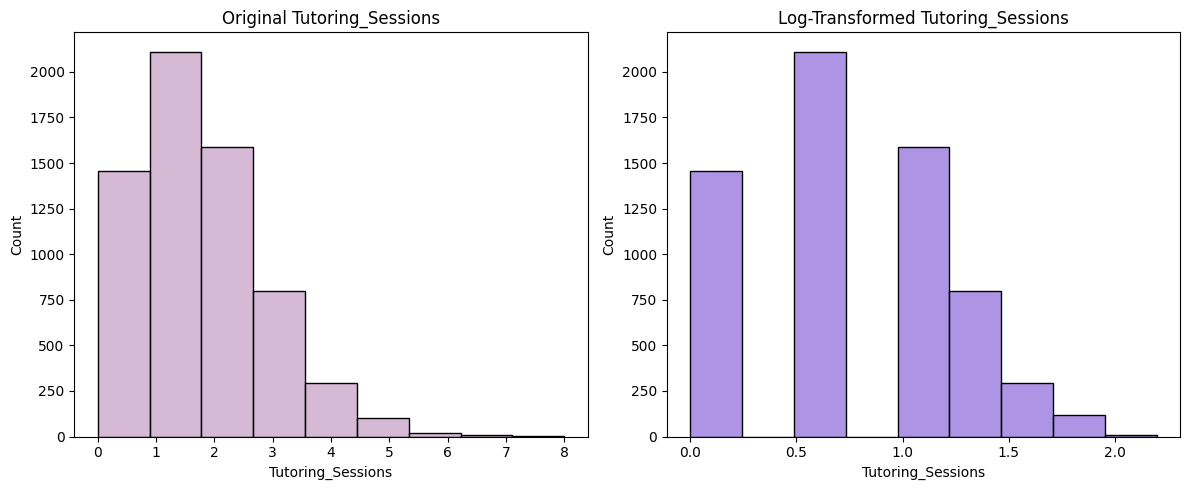

In [ ]:
plt.figure(figsize=(12,5))

# 원본 분포
plt.subplot(1,2,1)
sns.histplot(df_encoded['Tutoring_Sessions'], bins=9, color="#C8A2C8", kde=False)
plt.title("Original Tutoring_Sessions")

# 로그 변환 분포
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_encoded['Tutoring_Sessions']), bins=9, color="#9370DB", kde=False)
plt.title("Log-Transformed Tutoring_Sessions")

plt.tight_layout()
plt.show()


- 현재 로그변환을 진행하였을 경우 왜도가 줄어듬이 보이므로 BaseLine인 선형회귀 모델링 단계에서는 로그변환을 하여 모델 적합을 진행하는게 좋아보임.

In [ ]:
# 1) 원본 데이터셋 (트리 모델용)
df_tree = df_encoded.copy()

# 2) 로그 변환 데이터셋 (선형 회귀용)
df_linear = df_encoded.copy()
df_linear['Tutoring_Sessions'] = np.log1p(df_linear['Tutoring_Sessions'])


- 로그변환을 진행하였고, 기초통계량을 보며 어떠한 스케일링 방법이 좋을 지 확인해야함.

In [ ]:
df_linear.describe()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,...,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,2.098165,7.035126,75.063353,1.908107,0.787520,1.787831,2.197115,2.191626,...,1.705504,1.503685,67.246825,0.578328,0.695154,0.596832,0.924102,0.104751,0.202289,0.509801
std,5.985283,11.549434,0.698689,1.468091,14.399766,0.695720,0.516659,0.743430,0.601027,0.756386,...,0.780581,0.670465,3.891637,0.493865,0.460378,0.490572,0.264855,0.306257,0.401738,0.499943
min,1.000000,60.000000,1.000000,4.000000,50.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,2.000000,6.000000,63.000000,1.000000,0.693147,1.000000,2.000000,2.000000,...,1.000000,1.000000,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,7.000000,75.000000,2.000000,0.693147,2.000000,2.000000,2.000000,...,2.000000,1.000000,67.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,90.000000,3.000000,8.000000,88.000000,2.000000,1.098612,2.000000,3.000000,3.000000,...,2.000000,2.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,44.000000,100.000000,3.000000,10.000000,100.000000,3.000000,2.197225,3.000000,3.000000,3.000000,...,3.000000,3.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 현재 극단적으로 큰 값이 존재하지 않고, 0에서 100사이에 값들이 존재하므로, StandardScaler를 이용하여 우선적으로 진행하는게 좋아보임.
- 스케일링 전에 주의할 점
> - 목표변수 Exam_Score는 스케일링을 하지 않는다.
> - 훈련셋과 테스트셋을 분리한 후 스케일링을 진행한다.
> - 더미변수는 꼭 스케일링할 필요가 없다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y 분리
X = df_linear.drop(columns=['Exam_Score'])
y = df_linear['Exam_Score']

# Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터로 fit + transform
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터는 transform만

print("훈련 데이터 shape:", X_train_scaled.shape)
print("테스트 데이터 shape:", X_test_scaled.shape)


훈련 데이터 shape: (5101, 20)
테스트 데이터 shape: (1276, 20)


## Step6. 피처 엔지니어링

피처 엔지니어링으로 할 수 있는 다양한 방법에 대해 생각해보자.

- 파생 변수 생성
> - 수면 시간을 구간화
> - 출석률 구간화

- 변수 간 상호작용
> - 공부시간 * 동기레벨 => 공부효율이 달라질 수 있다.
> - 가족소득 * 자원 접근성 => 질 좋은 공부로 인한 성적 상승을 기대할 수 있다.
> - 수면시간 * 야외활동여부 => 건강한 맨탈로 성적 상승을 기대할 수 있다.

=> 다음과 같은 피처들로 인해 변수의 개수가 너무 많아지기에 적용할지에 대한 여부는 이후 모델링 과정에서의 정확성과 해석여부에 따라 파생변수를 추가하고 다른 의미 없는 피처를 제거하는 과정을 진행하고자 한다.

In [ ]:

# df_features = df_linear.copy()

# # 파생 변수 생성
# df_features['Study_Efficiency'] = df_features['Exam_Score'] / (df_features['Hours_Studied'] + 1)  # 0으로 나눔 방지
# df_features['Improvement'] = df_features['Exam_Score'] - df_features['Previous_Scores']

# # 구간화 (Binning)
# df_features['Sleep_Category'] = pd.cut(df_features['Sleep_Hours'],
#                                        bins=[0, 5, 8, 12],
#                                        labels=['Low', 'Normal', 'High'])

# df_features['Attendance_Level'] = pd.cut(df_features['Attendance'],
#                                          bins=[0, 60, 85, 100],
#                                          labels=['Low', 'Medium', 'High'])

# # 상호작용 변수
# df_features['Study_Motivation'] = df_features['Hours_Studied'] * df_features['Motivation_Level']
# df_features['Resource_Income'] = df_features['Access_to_Resources'] * df_features['Family_Income']

# # 이진 변수 (고득점자 여부)
# df_features['High_Achiever'] = (df_features['Previous_Scores'] > 85).astype(int)

# # 원-핫 인코딩 (새로운 범주형 컬럼들 변환)
# df_features = pd.get_dummies(df_features,
#                              columns=['Sleep_Category', 'Attendance_Level'],
#                              drop_first=True, dtype=int)

# print("피처 엔지니어링 후 shape:", df_features.shape)
# df_features.head()


- df : 원본 데이터
- df_clean : 전처리 이후 데이터
- df_encoded : 인코딩 이후 데이터
- df_tree : 인코딩 이후 데이터 복사본
- df_linear : 로그 변환후 데이터

In [ ]:
df_clean[num_cols].corr(numeric_only=True)  # 원본 데이터 상관관계 확인

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.005285,0.013251,0.022268,-0.010184,0.003179,0.446174
Attendance,-0.005285,1.000000,-0.019434,-0.018393,0.011386,-0.022987,0.581664
Sleep_Hours,0.013251,-0.019434,1.000000,-0.023104,-0.011159,-0.002895,-0.016314
Previous_Scores,0.022268,-0.018393,-0.023104,1.000000,-0.013723,-0.006700,0.173635
Tutoring_Sessions,-0.010184,0.011386,-0.011159,-0.013723,1.000000,0.016324,0.153986
Physical_Activity,0.003179,-0.022987,-0.002895,-0.006700,0.016324,1.000000,0.025260
Exam_Score,0.446174,0.581664,-0.016314,0.173635,0.153986,0.025260,1.000000


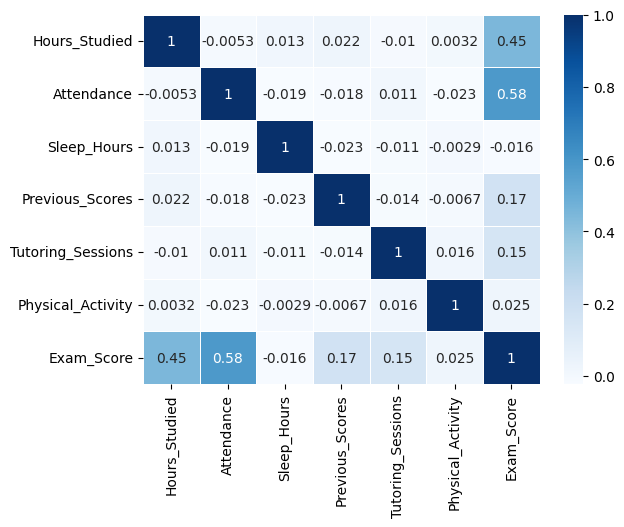

In [ ]:
sns.heatmap(data=df_clean[num_cols].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

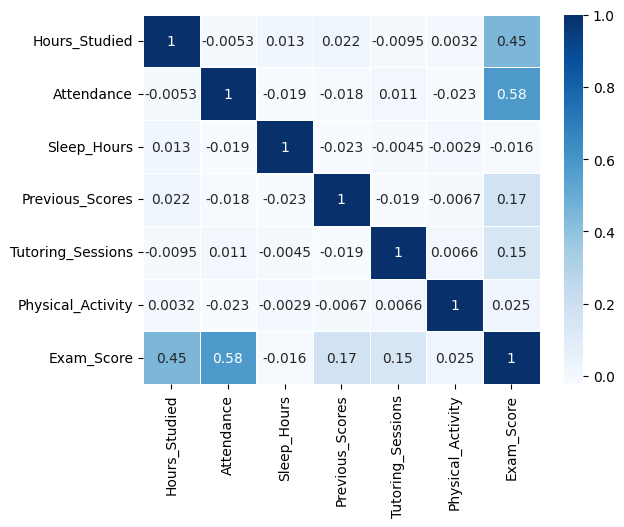

In [ ]:
sns.heatmap(data = df_linear[num_cols].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

In [ ]:
# 범주형 변수별 Exam_Score 평균 요약
summary_tables = {}

for col in cat_cols:
    summary = df_clean.groupby(col)['Exam_Score'].mean().sort_values(ascending=False)
    summary_tables[col] = summary
    print(f"\n[{col}]")
    print(summary)


[Parental_Involvement]
Parental_Involvement
High      68.112200
Medium    67.113196
Low       66.351938
Name: Exam_Score, dtype: float64

[Access_to_Resources]
Access_to_Resources
3    68.103158
2    67.145801
1    66.223705
Name: Exam_Score, dtype: float64

[Extracurricular_Activities]
Extracurricular_Activities
Yes    67.446138
No     66.951770
Name: Exam_Score, dtype: float64

[Motivation_Level]
Motivation_Level
3    67.743931
2    67.338894
1    66.746108
Name: Exam_Score, dtype: float64

[Internet_Access]
Internet_Access
Yes    67.309520
No     66.483471
Name: Exam_Score, dtype: float64

[Family_Income]
Family_Income
3    67.814483
2    67.371005
1    66.853215
Name: Exam_Score, dtype: float64

[Teacher_Quality]
Teacher_Quality
3    67.664391
2    67.118662
1    66.775889
Name: Exam_Score, dtype: float64

[School_Type]
School_Type
Private    67.316358
Public     67.216332
Name: Exam_Score, dtype: float64

[Peer_Influence]
Peer_Influence
3    67.623433
2    67.215631
1    66.58270

/tmp/ipython-input-3662238498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Exam_Score', y=col, ax=axes[i], palette="pastel")
/tmp/ipython-input-3662238498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Exam_Score', y=col, ax=axes[i], palette="pastel")
/tmp/ipython-input-3662238498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Exam_Score', y=col, ax=axes[i], palette="pastel")
/tmp/ipython-input-3662238498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is d

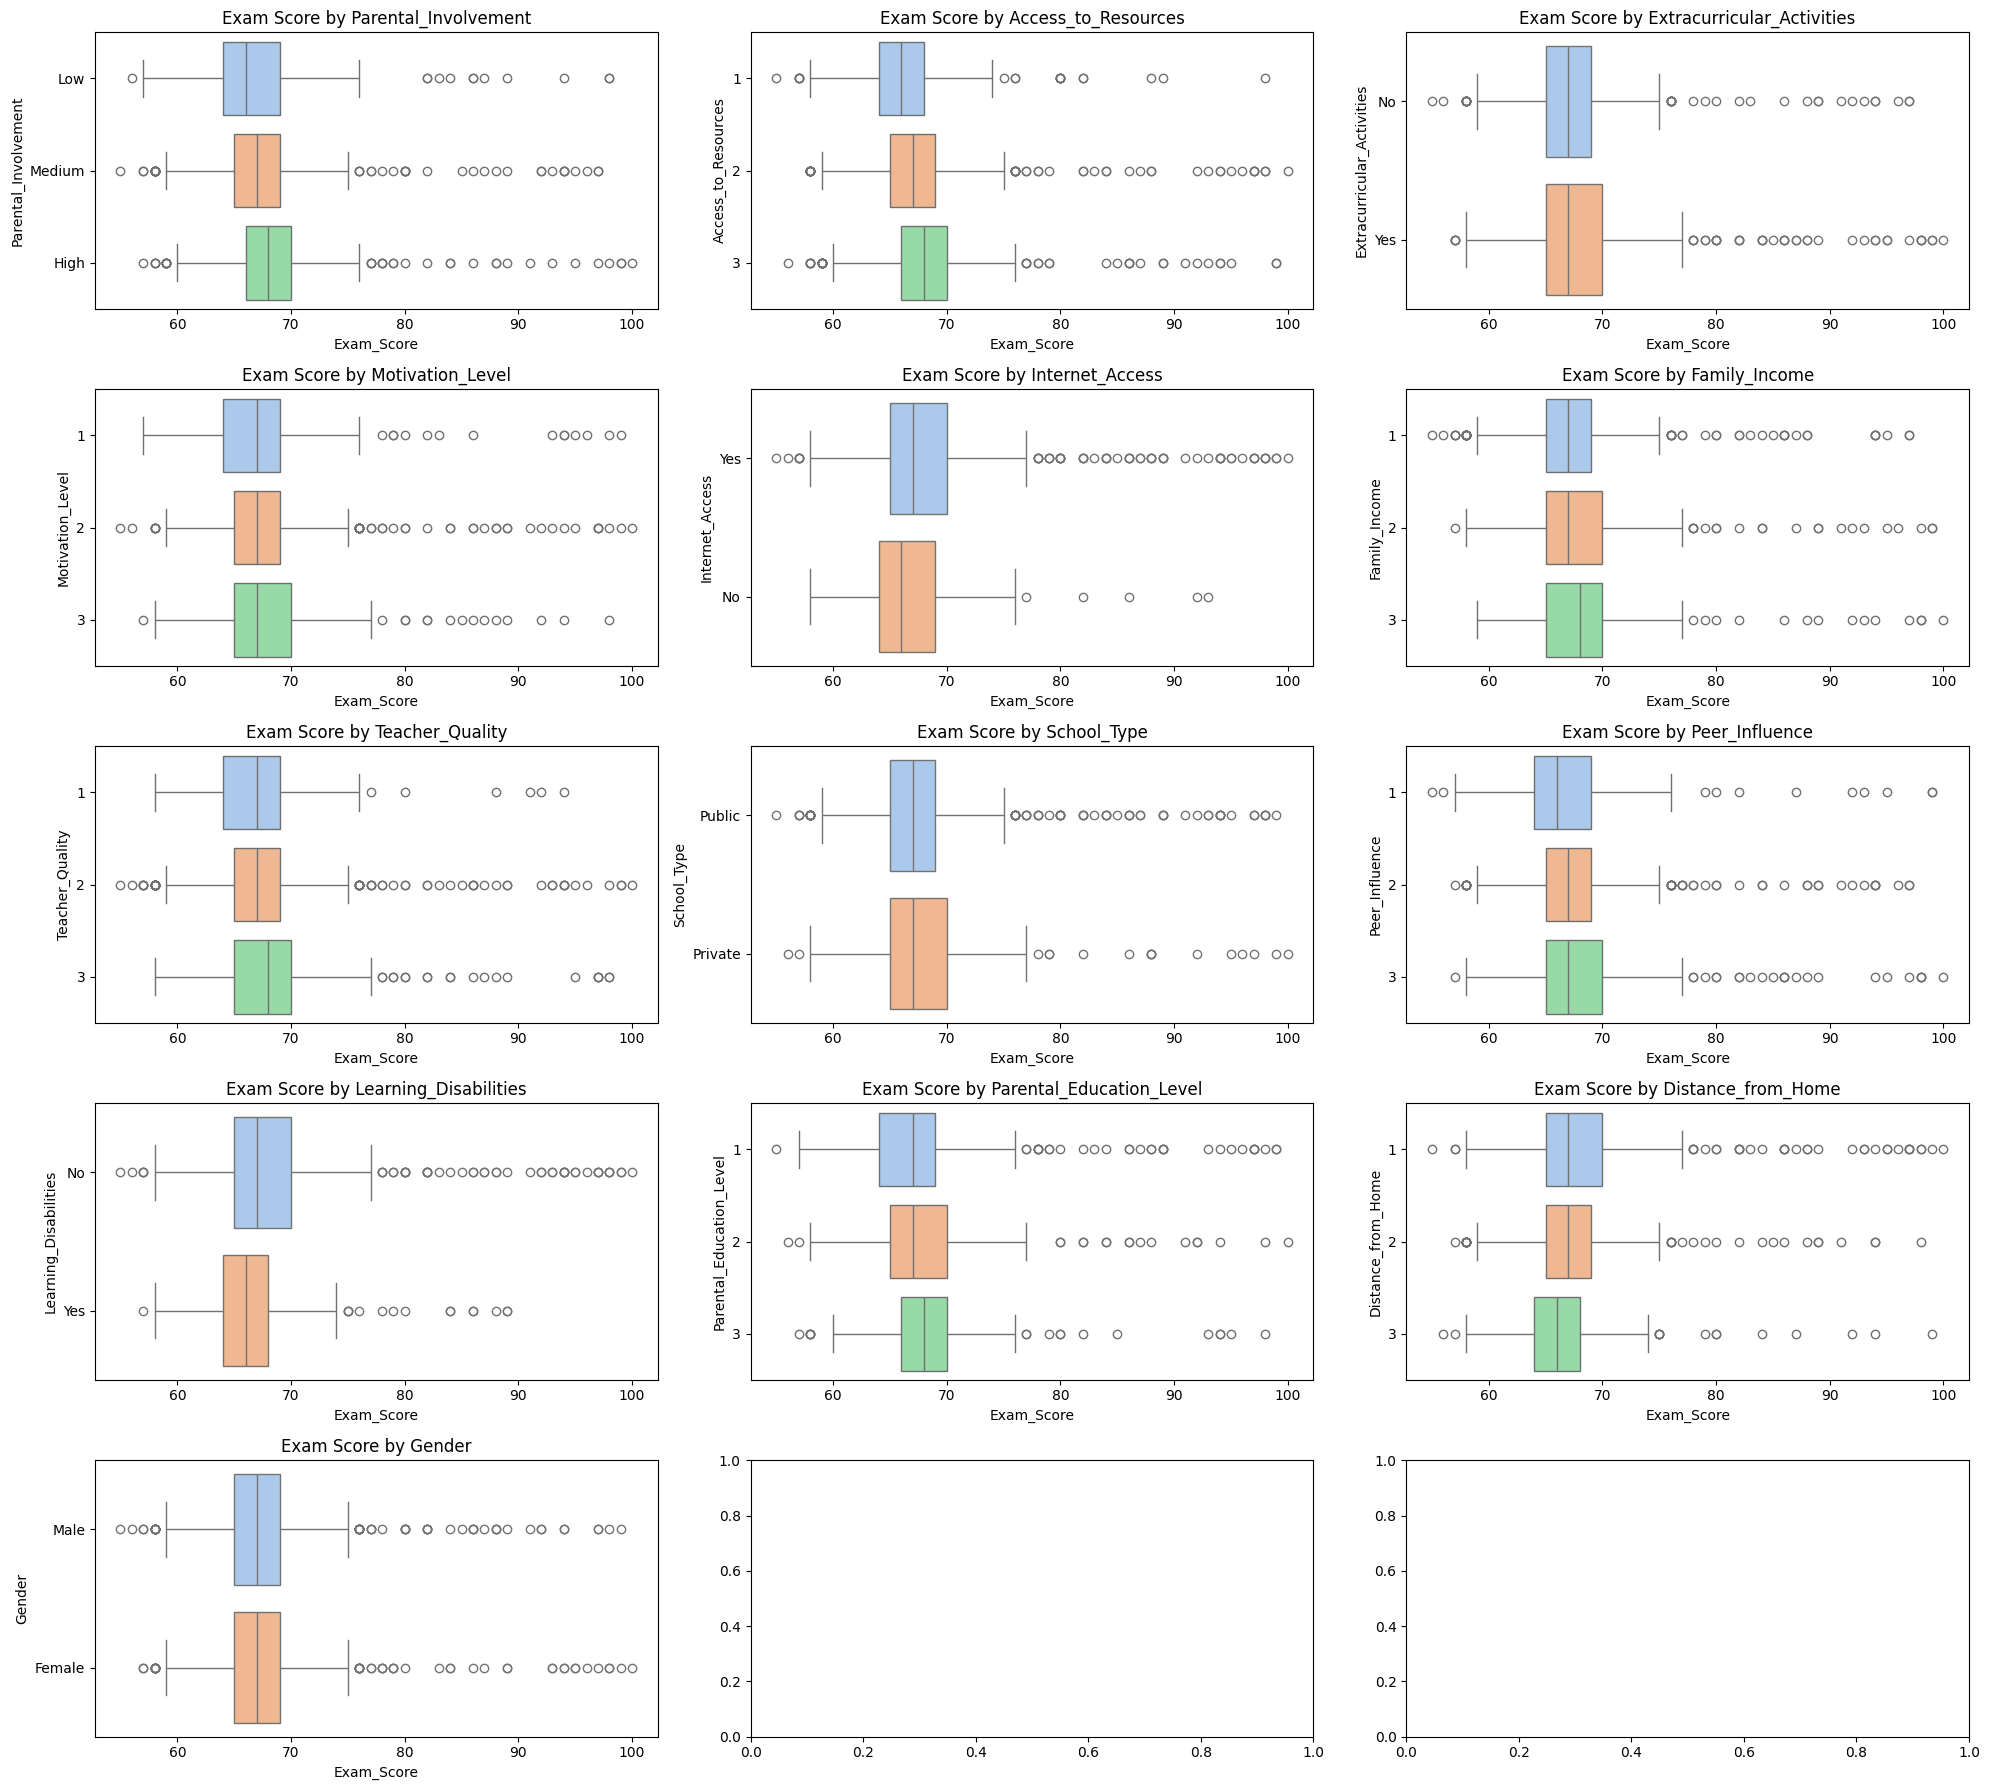

In [ ]:
df_viz = df_clean.copy()

# 숫자로 인코딩된 순서형 변수를 카테고리로 변환
ordinal_cols = ["Motivation_Level","Parental_Education_Level","Teacher_Quality",
                "Access_to_Resources","Family_Income","Peer_Influence","Distance_from_Home"]

for col in ordinal_cols:
    df_viz[col] = df_viz[col].astype("category")

# 가로형 박스플롯 시각화
fig, axes = plt.subplots(5, 3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df_viz, x='Exam_Score', y=col, ax=axes[i], palette="pastel")
    axes[i].set_title(f"Exam Score by {col}")

plt.tight_layout()
plt.show()


In [ ]:
df_tree.to_csv('df_tree.csv', index=False)

In [ ]:
df_linear.to_csv('df_linear.csv', index=False)

- 숫자형 변수들 간의 상관관계(피어슨 상관관계) 해석
  > - 목표변수 : Exam_Scores
  > - Attendance : 0.58, Hours_Studied : 0.45 => 상관관계가 존재함
  > - Previous_Scores : 0.17, Tutoring_Sessions : 0.15 => 상관관계가 약함
  > - Physical_Activity : 0.03, Sleep_Hours : -0.02 => 상관관계가 거의 없음

- 범주형 변수들 간의 관계 해석
  > - 강한 경향 : Parental_Involvement, Access_to_Resources, Motivation_Level, Teacher_Quality, Peer_Influence, Parental_Education_Level
  > - 중간 경향 : Extracurricular_Activities, Internet_Access, Family_Income
  > - 약한 경향 : School_Type, Gender
  > - 부정적 영향 : Learning_Disabilities, Distance_from_Home

## 진행 상황

### 이번 주 진행 상황
- 데이터 전처리 및 피처 엔지니어링
> - 파생 변수 후보 아이디어 정리 및 코드 설계
> - 하지만 적용 여부는 모델링을 진행한 후 평가/해석을 보고 결정

### 다음 주 진행 방향
1. Baseline 모델 구축
> - 선형회귀
>> - 베이스라인 성능 확인 및 유의성 판단
>> - 현재 변수 해석에 대한 주제이므로 Baseline이 생각보다 중요하다고 판단

2. 모델 성능 비교
> - 선형회귀 이외에 Ridge, Lasso. Elastic 과 같은 정규화 회귀
> - RandomForest, XGBoost 와 같은 트리 기반 모델로 성능 비교 및 피처 중요도 확인

3. 모델 비교 이후 피처 엔지니어링 재검토
> - Baseline과 모델 결과 비교 후, 성능이 향상되는 변수는 유지, 의미 없는 피처는 제거

# Week3에서의 전체적인 흐름
- Task1. 모델링
> - 목적에 맞는 모델 학습 및 예측
> - train/test 분리
> - 학습과정, 하이퍼파라미터 튜닝, 학습시간 및 난이도 정리

- Task2. 모델 평가
> - 성능 지표를 통해 BaseLine의 모델과 비교
>> - 분류 : accuracy, confusion matrix, ROC-AUC curve, F1-score 등
>> - 회귀 : MSE, MAE, $R^2$, RMSE 등
> - 각 지표의 의미 및 모델 성능 비교 + 모델 해석 관점에서의 평가 + 시각화
> - 각 모델의 장단점과 결과 해석에 중점

## 진행 방향

1. Baseline 모델 구축
> - 선형회귀(OLS)
>> - 베이스라인 성능 확인 및 유의성 판단 (회귀 계수에 대한 변수 영향력 확인)
>> - 현재 변수 해석에 대한 주제이므로 Baseline이 생각보다 중요하다고 판단

2. 모델 성능 비교
> - 선형회귀 이외에 Ridge, Lasso. Elastic 과 같은 정규화 회귀 (다중공선성 보완)
> - RandomForest, XGBoost 와 같은 트리 기반 모델로 성능 비교 및 피처 중요도 확인

3. 모델 평가
> - 평가 지표(회귀 모델)
>> - MSE : 오차 제곱 평균 (큰 오차에 민감)
>> - RMSE : 실제 단위로 해석 가능
>> - MAE : 평균 절대 오차 (직관적인 오차 확인)
>> - $R^2$ : 모델 설명력 확인
> - 추가 분석
>> - 잔차 확인 (Residual 시각화) : 모델 적합성 확인
>> - Feature Importance / SHAP : 트리 모델의 해석 강화

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_linear = pd.read_csv('/content/drive/MyDrive/EPOCH4기/df_linear.csv')
df_tree = pd.read_csv('/content/drive/MyDrive/EPOCH4기/df_tree.csv')

In [7]:
df_linear  # 다시 확인

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0.000000,1,2,3,...,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,1.098612,2,2,1,...,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,1.098612,2,2,2,...,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,0.693147,2,2,1,...,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,1.386294,2,3,2,...,2,1,70,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,25,69,2,7,76,2,0.693147,3,2,3,...,1,1,68,0,1,0,1,0,0,0
6373,23,76,2,8,81,2,1.386294,1,3,3,...,1,1,69,0,1,0,1,0,0,0
6374,20,90,1,6,65,1,1.386294,1,2,1,...,3,1,68,0,1,1,1,0,0,1
6375,10,86,3,6,91,3,1.098612,1,2,3,...,1,3,68,0,0,1,1,0,0,0


In [8]:
df_tree  # 다시 확인

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0,1,2,3,...,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,2,2,2,1,...,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,2,2,2,2,...,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,1,2,2,1,...,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,3,2,3,2,...,2,1,70,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,25,69,2,7,76,2,1,3,2,3,...,1,1,68,0,1,0,1,0,0,0
6373,23,76,2,8,81,2,3,1,3,3,...,1,1,69,0,1,0,1,0,0,0
6374,20,90,1,6,65,1,3,1,2,1,...,3,1,68,0,1,1,1,0,0,1
6375,10,86,3,6,91,3,2,1,2,3,...,1,3,68,0,0,1,1,0,0,0


## Baseline (linear regression) 구축
- 학생의 성적에 영향을 미치는 요인을 파악하기 위해 목표변수 Exam_score에 대한 회귀를 진행하기 위해 가장 기초가 되는 Baseline으로 선형회귀를 진행한다.
- 선형 회귀에 있어서 요인에 중점을 두기에 statsmodels의 OLS 함수를 이용한다.

In [9]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path

In [10]:
df_linear.info()  # 다시 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6377 entries, 0 to 6376
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6377 non-null   int64  
 1   Attendance                      6377 non-null   int64  
 2   Access_to_Resources             6377 non-null   int64  
 3   Sleep_Hours                     6377 non-null   int64  
 4   Previous_Scores                 6377 non-null   int64  
 5   Motivation_Level                6377 non-null   int64  
 6   Tutoring_Sessions               6377 non-null   float64
 7   Family_Income                   6377 non-null   int64  
 8   Teacher_Quality                 6377 non-null   int64  
 9   Peer_Influence                  6377 non-null   int64  
 10  Physical_Activity               6377 non-null   int64  
 11  Parental_Education_Level        6377 non-null   int64  
 12  Distance_from_Home              63

In [19]:
X = df_linear.drop(columns = 'Exam_Score').copy()  # 목표변수 제거
y = df_linear['Exam_Score']

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled_const = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_const, y, test_size=0.2, random_state=100)

ols = sm.OLS(y_train, X_train).fit() # 학습
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     647.8
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:52:49   Log-Likelihood:                -10978.
No. Observations:                5101   AIC:                         2.200e+04
Df Residuals:                    5080   BIC:                         2.214e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [21]:
# 회귀 게수에 대한 추정을 위해 회귀계수만 따로 출력
coef_tbl = (
    pd.DataFrame({
        "beta": ols.params,
        "std_err": ols.bse,
        "t": ols.tvalues,
        "p": ols.pvalues
    })
    .sort_values("p")
)
display(coef_tbl)

,beta,std_err,t,p
const,67.631134,0.065310,1035.548086,0.000000e+00
Hours_Studied,2.328773,0.039022,59.679097,0.000000e+00
Attendance,3.960682,0.050813,77.946630,0.000000e+00
Access_to_Resources,1.053601,0.041951,25.115161,2.605124e-131
Previous_Scores,1.210773,0.050494,23.978555,1.841905e-120
Parental_Involvement_Low,-2.001768,0.085011,-23.547207,1.899059e-116
Tutoring_Sessions,0.466696,0.022961,20.325679,2.293491e-88
Parental_Involvement_Medium,-1.093700,0.068173,-16.043045,1.535444e-56
Parental_Education_Level,0.509810,0.037362,13.645049,1.163242e-41
Peer_Influence,0.520814,0.038816,13.417465,2.309507e-40


- OLS 전체 적합도
> - $R^2$ = 0.718, Adj_$R^2$ = 0.717 => 설명력 매우 양호
> - F-통계량 p-값 = 0.000 => 모형이 유의함
> - Durbin-Watson = 2.01 => 자기상관 문제는 없어 보임
> - Omnibus/JB 매우 큼, Skew 11.31, Kurtosis 137.69 => 잔차 정규성 문제가 존재

- 목표변수에 영향을 주는 유의미한 변수
> - 양의 효과
>> - Tutoring_Sessions
>> - Internet_Access_Yes
>> - Access_to_Resources
>> - Extracurricular_Activities_Yes
>> - Motivation_Level
>> - Family_Income
>> - Teacher_Quality
>> - Peer_Influence
>> - Parental_Education_Level
>> - Hours_Studied
>> - Attendance
>> - Physical_Activity
>> - Previous_Scores
> - 음의 효과
>> - Parental_Involvement_Low
>> - Parental_Involvement_Medium
>> - Learning_Disabilities_Yes
>> - Distance_from_Home
> - 유의하지 않은 변수
>> - Sleep_Hours (p=0.653)
>> - Gender_Male (p=0.348)
>> - School_Type_Public (p=0.911)

Text(0.5, 1.0, 'Residuals vs Leverage')

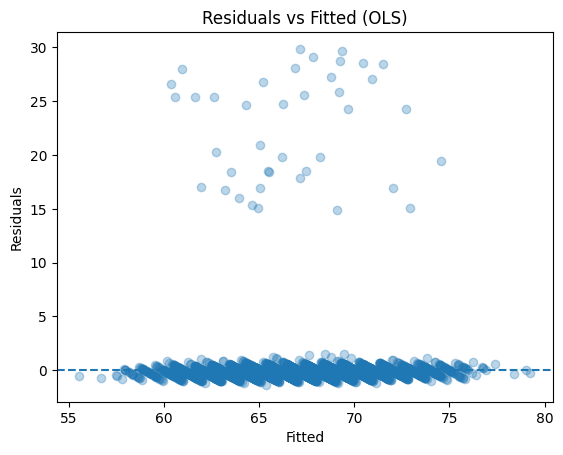

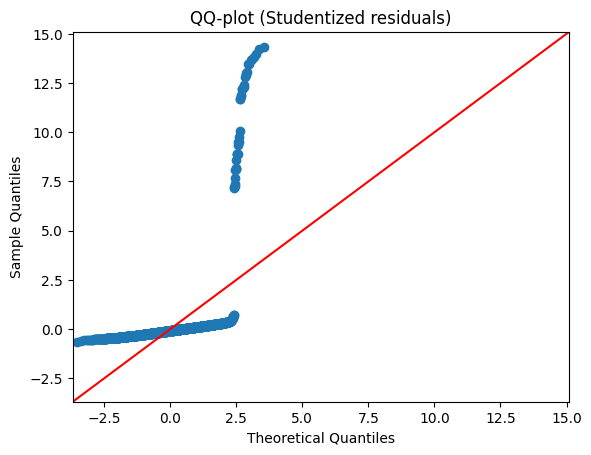

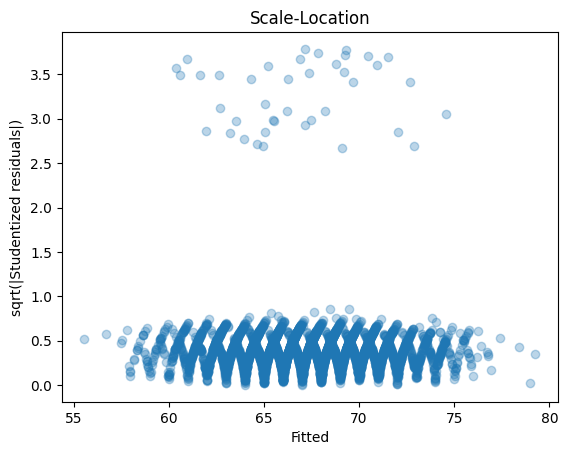

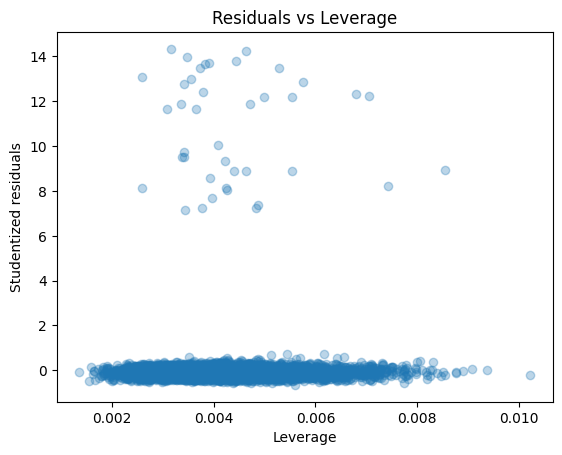

In [22]:
# 위에서 문제가 있던 잔차와 정규성에 대한 집중 파악을 위해 시각화 실시
fitted = ols.fittedvalues
resid  = ols.resid
infl   = ols.get_influence()
std_resid = infl.resid_studentized_internal
lev = infl.hat_matrix_diag

# 1) 산점도를 통한 잔차 그림
plt.figure()
plt.scatter(fitted, resid, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (OLS)')

# 2) QQ-plot (정규성)
sm.qqplot(std_resid, line='45')
plt.title('QQ-plot (Studentized residuals)')

# 3) 이분산성 파악을 위한 시각화
plt.figure()
plt.scatter(fitted, np.sqrt(np.abs(std_resid)), alpha=0.3)
plt.xlabel('Fitted')
plt.ylabel('sqrt(|Studentized residuals|)')
plt.title('Scale-Location')

# 4) Leverage 그래프 (+ 영향점 시사)
plt.figure()
plt.scatter(lev, std_resid, alpha=0.3)
plt.xlabel('Leverage')
plt.ylabel('Studentized residuals')
plt.title('Residuals vs Leverage')


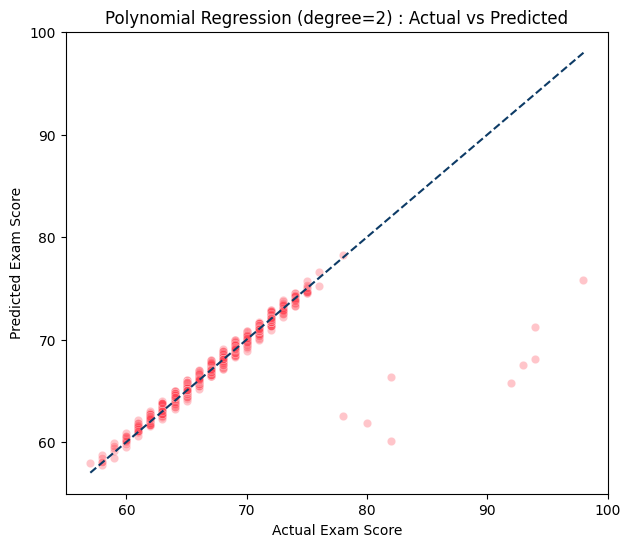

In [23]:
y_test_pred = ols.predict(X_test)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()

In [25]:
# 선형회귀(OLS)의 MSE, RMSE, MAE 값

yhat = ols.fittedvalues
mse  = mean_squared_error(y_train, yhat)
rmse = mse ** 0.5
mae  = mean_absolute_error(y_train, yhat)

print(f"MSE: {mse:.6f}  RMSE: {rmse:.6f}  MAE: {mae:.6f}")

MSE: 4.333545  RMSE: 2.081717  MAE: 0.511311


In [26]:
yhat_in = ols.fittedvalues
err = y - yhat_in

# 현재 지표 재확인
linear_mse  = np.mean(err**2)
linear_rmse = np.sqrt(mse)
linear_mae  = np.mean(np.abs(err))
print(f"MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}, RMSE/MAE={rmse/mae:.2f}")

# 1) 나이브(mean) 대비 개선율
rmse_naive = np.sqrt(np.mean((y - y.mean())**2))
mae_naive  = np.mean(np.abs(y - y.mean()))
print(f"Naive RMSE={rmse_naive:.4f}, MAE={mae_naive:.4f}")
print(f"RMSE 개선율={(1 - rmse/rmse_naive)*100:.2f}%  MAE 개선율={(1 - mae/mae_naive)*100:.2f}%")

# 2) 정규화 지표(NRMSE) - 표준편차/사분위범위/범위 기준
sd  = np.std(y, ddof=0)
iqr = np.subtract(*np.percentile(y, [75,25]))
rng = y.max() - y.min()
print(f"NRMSE(sd)={rmse/sd:.4f}  NRMSE(IQR)={rmse/iqr:.4f}  NRMSE(range)={rmse/rng:.4f}")


MSE=4.3335, RMSE=2.0817, MAE=0.5113, RMSE/MAE=4.07
Naive RMSE=3.8913, MAE=2.8540
RMSE 개선율=46.50%  MAE 개선율=82.08%
NRMSE(sd)=0.5350  NRMSE(IQR)=0.5204  NRMSE(range)=0.0463


- 현재 선형회귀의 경우 MAE=0.5113으로 굉장히 양호한 편이나, MSE값이 4 이상이기에 가장 이상적인 MSE < 1에 한참 못미치는 경향을 띈다고 볼 수 있다.
- 선형회귀의 경우 가장 단순한 모델인 나이브 베이즈 대비 얼만큼의 개선율을 보이는 지 알기 위해 개선율 계산 결과 46.5%, 82.08% 로 평균만 찍는 모델보다 상당히 낫다는 근거가 있다고 볼 수 있다.
- 하지만 위에서 보았던 것처럼 잔차 정규성에 위배가 되는 값이 존재하므로 이는 소수의 두꺼운 꼬리가 존재함을 알 수 있다.
- 하지만 나이브 베이즈보다 성능이 좋으므로 이는 'BaseLine'자체는 의미가 있다고 볼 수 있다.

## 트리 모델 구축
- Baseline과 비교되는 모델링을 진행.
- 목표변수에 영향을 미치는 요인을 파악하는 것이 목적이기에 XGBoost로 진행

In [27]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor

# df_tree 데이터프레임 선택 (Turtoring_Session의 비대칭성을 스케일링하지 않은 데이터)
y = df_tree["Exam_Score"].values
X = df_tree.drop(columns=["Exam_Score"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 랜덤포레스트, histGradientBoosting, XGBoost 모델링
rf  = RandomForestRegressor(n_estimators=600, max_features="sqrt",
                            n_jobs=-1, random_state=42)
hgb = HistGradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(n_estimators=600, random_state=42, n_jobs=-1)


models = {"RF": rf, "HGB": hgb, "XGBoost":xgb}

# 성능(hold-out) + 나이브 베이즈와 비교
y_mean = np.full_like(y_test, fill_value=y_train.mean())
print("Naive RMSE:",
      np.sqrt(mean_squared_error(y_test, y_mean)))

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae  = mean_absolute_error(y_test, pred)
    r2   = r2_score(y_test, pred)
    print(f"{name} MSE={mse: .4f} RMSE={rmse:.4f}  MAE={mae:.4f}  R²={r2:.4f}")


Naive RMSE: 3.9659601769800776
RF MSE= 5.7040 RMSE=2.3883  MAE=1.1318  R²=0.6356
HGB MSE= 4.8119 RMSE=2.1936  MAE=0.8272  R²=0.6926
XGBoost MSE= 5.7383 RMSE=2.3955  MAE=0.9879  R²=0.6334



Top-15 permutation importance


,feature,importance,std
1,Attendance,0.678380,0.019032
0,Hours_Studied,0.395331,0.018037
2,Access_to_Resources,0.058193,0.004559
4,Previous_Scores,0.057101,0.002793
18,Parental_Involvement_Low,0.054094,0.004779
6,Tutoring_Sessions,0.043722,0.004296
19,Parental_Involvement_Medium,0.024935,0.002277
9,Peer_Influence,0.017506,0.002690
11,Parental_Education_Level,0.013512,0.001489
12,Distance_from_Home,0.012644,0.002082


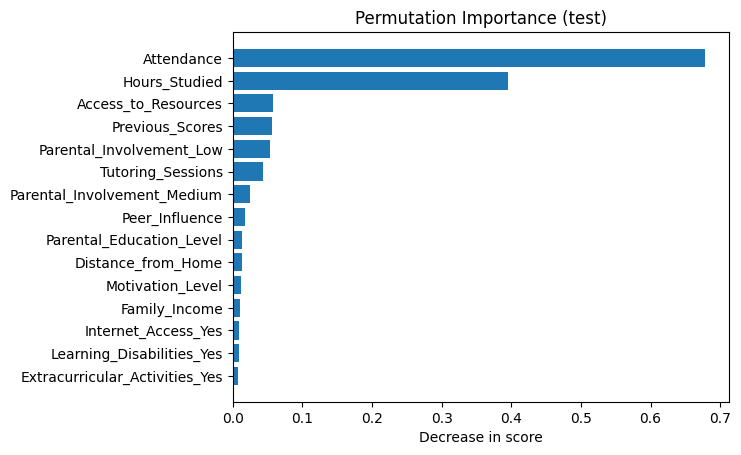

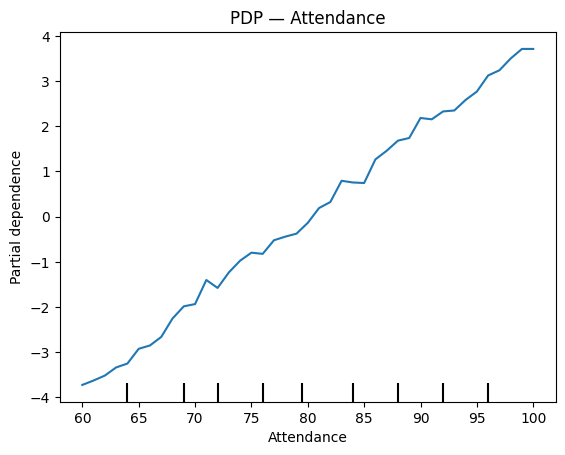

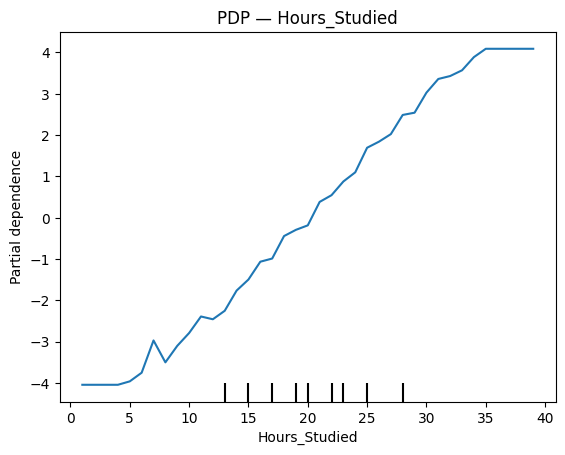

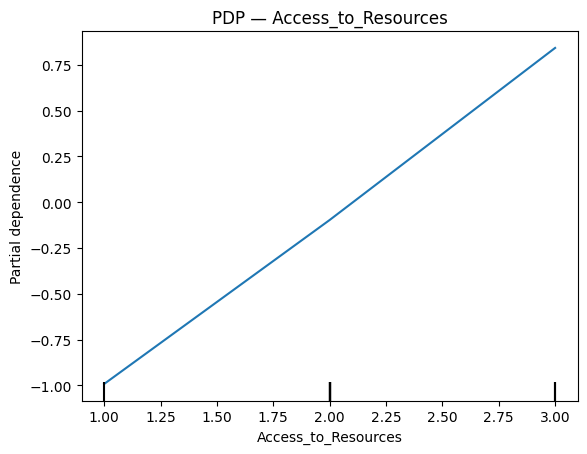

In [28]:
import pandas as pd, numpy as np
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt

# 사용 모델 고르기
model = hgb

# 퍼뮤테이션 중요도(검증셋 기준, 편향 적음)
perm = permutation_importance(model, X_test, y_test,
                              n_repeats=10, random_state=42, n_jobs=-1)
imp = (pd.DataFrame({"feature": X.columns,
                     "importance": perm.importances_mean,
                     "std": perm.importances_std})
       .sort_values("importance", ascending=False))

print("\nTop-15 permutation importance")
display(imp.head(15))

# 막대 그래프
top = imp.head(15).iloc[::-1]  # 아래에서 위로
plt.figure()
plt.barh(top["feature"], top["importance"])
plt.title("Permutation Importance (test)")
plt.xlabel("Decrease in score")

# ====== PDP: 상위 3개 변수의 효과 형태 확인 ======
top3 = imp["feature"].head(3).tolist()
for f in top3:
    PartialDependenceDisplay.from_estimator(model, X_test, [f])
    plt.title(f"PDP — {f}")


In [29]:
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
import numpy as np, pandas as pd

kf = KFold(n_splits=5, shuffle=True, random_state=42)
ranks = []
for tr, te in kf.split(X):
    m = HistGradientBoostingRegressor(random_state=42).fit(X.iloc[tr], y[tr])
    perm = permutation_importance(m, X.iloc[te], y[te], n_repeats=10, random_state=42, n_jobs=-1)
    ranks.append(pd.Series(perm.importances_mean, index=X.columns).rank(ascending=False))
rank_df = pd.concat(ranks, axis=1)
rank_df.mean(axis=1).sort_values().head(10)  # 평균 순위


,0
Attendance,1.0
Hours_Studied,2.0
Previous_Scores,3.4
Access_to_Resources,4.0
Parental_Involvement_Low,4.6
Tutoring_Sessions,6.0
Parental_Involvement_Medium,7.0
Peer_Influence,8.8
Family_Income,9.8
Motivation_Level,10.2


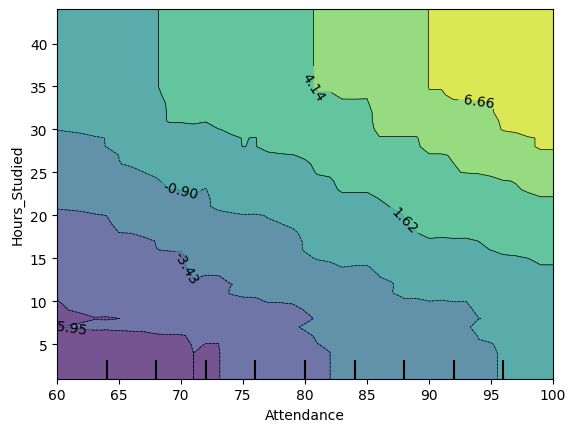

In [30]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(hgb, X, [("Attendance","Hours_Studied")])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 튜닝할 파라미터 범위 설정
param_dist = {
    'learning_rate': uniform(0.01, 0.2),      # 학습률
    'max_iter': randint(100, 1000),           # 부스팅 반복 횟수 (트리 개수)
    'max_leaf_nodes': randint(20, 100),       # 트리의 최대 리프 노드 수
    'l2_regularization': uniform(0, 1)        # L2 규제 강도
}

hgb = HistGradientBoostingRegressor(random_state=42)

# RandomizedSearchCV 설정
# n_iter: 랜덤하게 탐색할 횟수, cv: 교차 검증 횟수
random_search = RandomizedSearchCV(
    hgb,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# 최적의 파라미터를 찾아 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터와 최고 점수 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", -random_search.best_score_)

# 최적 모델로 예측 및 최종 평가
best_model = random_search.best_estimator_
pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"Tuned HGB RMSE={rmse:.4f}, R²={r2:.4f}")

Best Parameters: {'l2_regularization': np.float64(0.19427395351204224), 'learning_rate': np.float64(0.024188183399985533), 'max_iter': 499, 'max_leaf_nodes': 33}
Best Score (RMSE): 2.177579783330138
Tuned HGB RMSE=2.1701, R²=0.6991


## 모델 평가


1. 선형 모델이 왜 잘 나왔을까?
- 선형 모델의 $R^2$가 0.718로 현재 가장 높게 나온 것은 데이터의 피쳐들과 목표변수(Exam_Score) 사이에 강한 '선형 관계'가 존재함을 의미한다. 즉, 피쳐들이 일정하게 오를 수록 성적도 올라간다는 직선적인 관계를 잘 설명한다고 할 수있다.
- 선형 모델은 단순하지만 데이터가 선형적일 경우 매우 강력하게 해석된다.

2. 트리 모델은 왜 뒤쳐졌을까?
- 트리 모델(RandomForest, XGBoost, HGB)는 '비선형 관계'와 '특성의 중요도 및 상호작용'에 중점인 모델이다. 트리 모델의 경우 피처의 수가 많을수록 더 좋은 적합도를 보이는 경우가 대부분이라, 아마 트리 모델이 뒤쳐진 이유가 충분한 피처를 제공받지 못했을 가능성이 매우 크다고 볼 수 있다.

3. 전체 모델 평가
- 현재 데이터는 선형 모델이 가장 우수하다고 볼 수 있다. 이는 데이터가 강한 선형적인 관계를 가지고 있다는 것으로 볼 수 있다.
- 현재 트리 모델은 랜덤그리드서치를 통해서 최적의 파라미터를 찾아서 학습을 했음에도 선형 모델에 뒤쳐지는 것을 확인할 수 있다.

4. 이후 개선 방안
- 선형 모델의 경우 패널티(L1, L2, Elastic 규제)를 통해서 더욱 개선이 되는지 확인해야 한다.
- 트리 모델의 경우 파생변수 추가 및 피처 엔지니어링을 통해 모델의 피처 수를 늘려 모델을 개선해 보아야 한다.
- 단순 원-핫 인코딩이 아닌 구간화를 통해서 학습하는 방식도 고려하면 좋을 것 같다.  


### 최종 결론
- 현재는 선형 모델이 우수하지만, 추가적인 피처 엔지니어링을 통해 트리 모델의 개선여부가 있다.

#### 선형 모델
- OLS 전체 적합도
> - $R^2$ = 0.718, Adj_$R^2$ = 0.717 => 설명력 매우 양호
> - F-통계량 p-값 = 0.000 => 모형이 유의함
> - Durbin-Watson = 2.01 => 자기상관 문제는 없어 보임
> - Omnibus/JB 매우 큼, Skew 11.31, Kurtosis 137.69 => 잔차 정규성 문제가 존재

- 목표변수에 영향을 주는 유의미한 변수
> - 양의 효과
>> - Tutoring_Sessions
>> - Internet_Access_Yes
>> - Access_to_Resources
>> - Extracurricular_Activities_Yes
>> - Motivation_Level
>> - Family_Income
>> - Teacher_Quality
>> - Peer_Influence
>> - Parental_Education_Level
>> - Hours_Studied
>> - Attendance
>> - Physical_Activity
>> - Previous_Scores
> - 음의 효과
>> - Parental_Involvement_Low
>> - Parental_Involvement_Medium
>> - Learning_Disabilities_Yes
>> - Distance_from_Home
> - 유의하지 않은 변수
>> - Sleep_Hours (p=0.653)
>> - Gender_Male (p=0.348)
>> - School_Type_Public (p=0.911)

- "수면시간, 성별, 공립/사립" 변수는 시험 성적에 영향이 없는 것으로 알 수 있다.

#### 트리 모델
- XGBoost < RandomForest < HistGradientBoostingRegressor
- Attendence와 Hours_Studied가 약 95%의 중요도를 가지고 있다.
- 트리 모델로 알 수 있는 점은 "학생의 시험성적은 다른 무엇도 아닌 '출석'과 '공부시간'에 영향을 많이 받는다는 사실"을 알 수 있다.

## 추가 모델링 (다항 회귀)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df_linear.drop(columns = 'Exam_Score').copy()  # 목표변수 제거
y = df_linear['Exam_Score']

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_scaled_const = sm.add_constant(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_const, y, test_size=0.2, random_state=100)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Train R² : {train_r2:.4f}")
print(f"Test R²  : {test_r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")

Train R² : 0.7318
Test R²  : 0.7346
MAE      : 0.61
MSE      : 3.76
RMSE     : 1.94


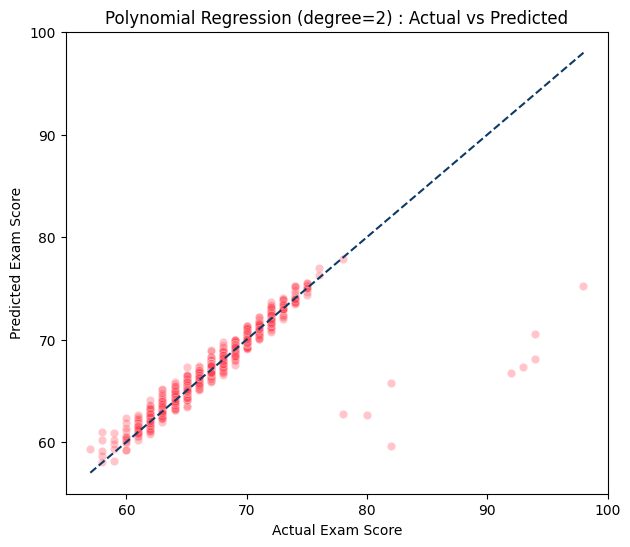

In [33]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()

- 다항분포의 경우 1차 직선 형태인 Linear Regression보다 모델 지표값이 다소 상승한 것을 보인다.
- 기존 선형 회귀 : R²: 0.7180, MAE : 0.51, MSE : 4.33, RMSE : 2.08
- 다항 선형 회귀 : R²: 0.7346, MAE : 0.61, MSE : 3.76, RMSE : 1.94
